In [2]:
import pandas as pd
import sqlite3

In [3]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

* analyze only the users and not the admins
* the fontsize and the figsize are still the same
* night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
* choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [17]:
timestamp = pd.read_sql("SELECT timestamp FROM checker " \
"WHERE uid LIKE 'user_%' ", connection)

timestamp['date'] = pd.to_datetime(timestamp["timestamp"]).dt.date
timestamp['hours'] = pd.to_datetime(timestamp['timestamp']).dt.hour
timestamp['daytime'] = pd.cut(x=timestamp['hours'], bins=[0, 4, 10, 17, 24], labels=['night', 'morning', 'afternoon', 'evening'])
timestamp

,timestamp,date,hours,daytime
0,2020-04-17 05:19:02.744528,2020-04-17,5,morning
1,2020-04-17 05:22:35.249331,2020-04-17,5,morning
2,2020-04-17 05:22:45.549397,2020-04-17,5,morning
3,2020-04-17 05:34:14.691200,2020-04-17,5,morning
4,2020-04-17 05:34:24.422370,2020-04-17,5,morning
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,evening
3203,2020-05-21 20:22:41.785725,2020-05-21,20,evening
3204,2020-05-21 20:22:41.877806,2020-05-21,20,evening
3205,2020-05-21 20:37:00.129678,2020-05-21,20,evening


In [23]:
connection.close()

In [18]:
timestamp = pd.DataFrame(timestamp.groupby(['date', 'daytime']).size()).reset_index().rename(columns={0 : 'commits'})
timestamp

/tmp/ipykernel_1097178/3592309439.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timestamp = pd.DataFrame(timestamp.groupby(['date', 'daytime']).size()).reset_index().rename(columns={0 : 'commits'})


,date,daytime,commits
0,2020-04-17,night,0
1,2020-04-17,morning,13
2,2020-04-17,afternoon,10
3,2020-04-17,evening,0
4,2020-04-18,night,0
...,...,...,...
135,2020-05-20,evening,10
136,2020-05-21,night,0
137,2020-05-21,morning,1
138,2020-05-21,afternoon,28


In [40]:
pivot_table = pd.DataFrame(timestamp.pivot_table(index='date', columns='daytime', values='commits').fillna(0))
pivot_table

/tmp/ipykernel_1097178/1225550747.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.DataFrame(timestamp.pivot_table(index='date', columns='daytime', values='commits').fillna(0))


daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0.0,13.0,10.0,0.0
2020-04-18,0.0,1.0,40.0,28.0
2020-04-19,0.0,11.0,9.0,11.0
2020-04-20,0.0,0.0,15.0,10.0
2020-04-21,0.0,0.0,9.0,16.0
2020-04-22,0.0,0.0,4.0,24.0
2020-04-23,0.0,6.0,15.0,20.0
2020-04-24,0.0,2.0,12.0,2.0
2020-04-25,1.0,21.0,48.0,34.0


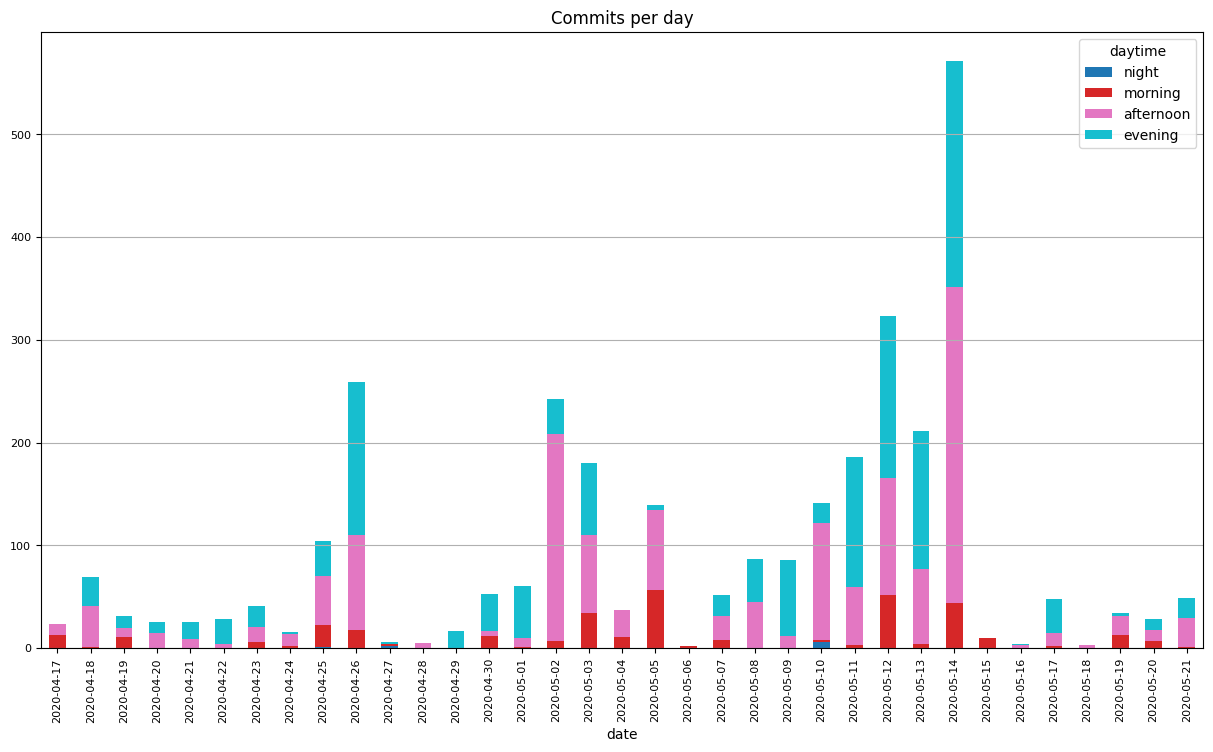

In [55]:
ax = pivot_table.plot.bar(fontsize=8, figsize=(15, 8), stacked=True, colormap='tab10', title='Commits per day')
ax.tick_params(axis='x', rotation=90)
ax.grid(axis='y')
